# Problem Formulation

1. Calculate nodal temperatures of the given 2D structure composed of several plates with different
conductivity properties for the stationary heat transfer process with respect to known
temperatures, heat input/output, convection through the surface. The convection through the
sides of the structure is not taken into account. It is recommended to use MATLAB for the
calculations and visualization.

2. Generate a finer mesh (divide given triangle into 4, 16, etc. triangles). Compare the results with
the results obtained for the given geometry. Prove that the model converges (provide results for
several models with mesh of different fineness). If the model does not converge, explain why.

3. Analyze the convergence of the model if there is no heat input/output (Q) and known
temperature (𝑇𝐴).

![title](img/var1.PNG)

The report consists of:
1. geometry of given structure, scheme of given heat sources and convection conditions;
2. main points of theory which was applied in calculations;
3. script;
4. analysis of convergence;
5. conclusions.

In [15]:
%conda activate pg


Note: you may need to restart the kernel to use updated packages.


In [277]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.meshtools import polytools as plc
from pygimli.meshtools import quality
import matplotlib.pyplot as plt
import numpy as np

(<AxesSubplot:>, None)

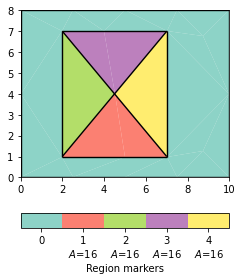

In [294]:
world = mt.createWorld(start=[0, 0], end=[10, 8], marker = 0, area = 0,
                       worldMarker=False)


p1 = mt.createPolygon([[2, 1], [4.5, 4], [7, 1]],
                          isClosed=True, marker=1, area=16)

p2 = mt.createPolygon([[2, 1], [4.5, 4], [2, 7]],
                          isClosed=True, marker=2, area=16)

p3 = mt.createPolygon([[7, 7], [4.5, 4], [2, 7]],
                          isClosed=True, marker=3, area=16)

p4 = mt.createPolygon([[7, 7], [4.5, 4], [7, 1]],
                          isClosed=True, marker=4, area=16)

# Merge geometrical entities
geom = world + p1 + p2 + p3 + p4
pg.show(geom, boundaryMarker=True)

(<AxesSubplot:>, None)

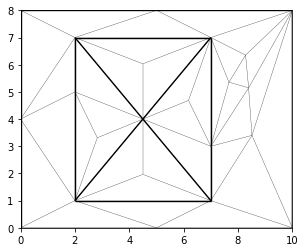

In [318]:
mesh = mt.createMesh(geom, quality=1, area=4, smooth=[5, 2])
pg.show(mesh)

In [313]:
T

22 [1.0, 1.0, 10.0, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.169633903134021, -0.125, -0.125, 0.9999999999999998, 1.0, 1.0, 1.0, 4.836931908832041, 2.9974977777778715, 5.538411714828406, 0.9999999999999999, 1.0]

Mesh:  Mesh: Nodes: 22 Cells: 35 Boundaries: 56
Assembling time:  0.001
Solving time:  0.0


(<AxesSubplot:>, None)

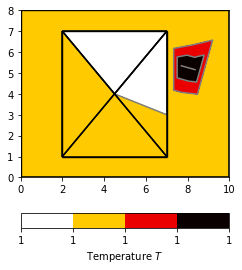

In [319]:
T = pg.solver.solveFiniteElements(mesh,
                                  a={0:1 ,1:1, 2: 2.0, 3: 3.0, 4:1},
                                  bc={'Dirichlet': {1: 1, 2: 1.0}}, verbose=True)

ax, _ = pg.show(mesh, data=T, label='Temperature $T$', cMap="hot_r")
pg.show(geom, ax=ax, fillRegion=False)


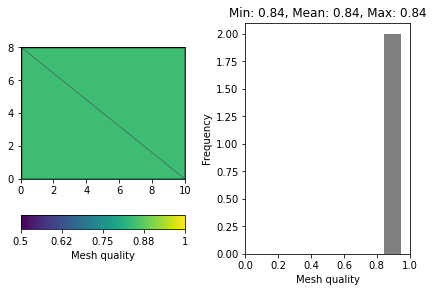

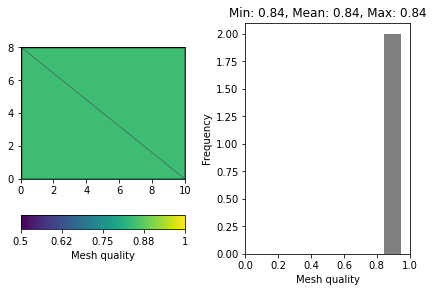

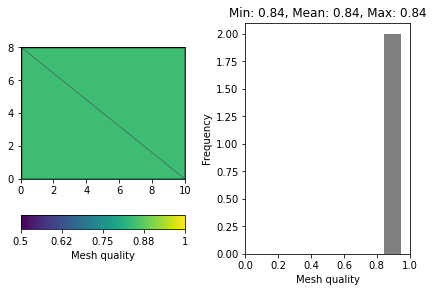

In [300]:
def showQuality(mesh, qualities):
    fig, axes = plt.subplots(1, 2)
    axes[1].hist(qualities, color="grey")
    pg.show(mesh, qualities, ax=axes[0], cMin=0.5, cMax=1, hold=True,
            logScale=False, label="Mesh quality", showMesh=True)
    s = "Min: %.2f, Mean: %.2f, Max: %.2f" % (
        np.min(qualities), np.mean(qualities), np.max(qualities))
    axes[1].set_title(s)
    axes[1].set_xlabel("Mesh quality")
    axes[1].set_ylabel("Frequency")
    axes[1].set_xlim(0, 1)

    # Figure resizing according to mesh dimesions
    x = mesh.xmax() - mesh.xmin()
    y = mesh.ymax() - mesh.ymin()
    width, height = fig.get_size_inches()
    fig.set_figheight(height * 1.3 * (y / x))
    fig.tight_layout()


for q in 10, 20, 30:
    m = pg.meshtools.createMesh([world], quality=q)
    showQuality(m, quality(m))